## Libraries

In [0]:
import pandas as pd
import numpy as np

In [0]:
import sys
!{sys.executable} -m pip install numpy==1.15.0

    100% |████████████████████████████████| 13.9MB 3.1MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.1 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.tabular import *

In [0]:
from google.colab import *
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Data

In [0]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/kaggle-titanic/data/train.csv')

In [0]:
dft = pd.read_csv('gdrive/My Drive/Colab Notebooks/kaggle-titanic/data/test.csv')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
dep_var = 'Survived'
cat_names = ['Sex', 'Pclass', 'Embarked']
cont_names = ['Age', 'SibSp', 'Parch', 'Fare']
procs = [FillMissing, Categorify, Normalize]

In [0]:
valid_idx = list(range(int(len(df)*0.8), len(df)))

In [0]:
data = (TabularList.from_df(df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [0]:
data.show_batch(rows=10)

Sex,Pclass,Embarked,Age_na,Age,SibSp,Parch,Fare,target
male,1,S,False,0.4902,-0.4962,-0.4698,-0.1278,1
female,1,#na#,False,0.6437,-0.4962,-0.4698,0.9757,1
male,3,S,False,0.4902,0.4434,0.7600,-0.1718,0
male,3,C,False,-0.7375,-0.4962,-0.4698,-0.5855,0
male,2,S,False,-0.3539,-0.4962,-0.4698,-0.4008,0
female,1,Q,False,0.2600,0.4434,-0.4698,1.1812,1
male,1,C,False,-0.1236,0.4434,-0.4698,1.0203,0
male,3,S,False,-1.5816,0.4434,0.7600,-0.3412,1
female,3,S,False,-1.0445,4.2016,1.9898,0.2957,0
male,3,S,False,-0.0469,-0.4962,-0.4698,-0.5025,0


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [0]:
learn.fit(24, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.379989,0.346787,0.877095
2,0.381269,0.408460,0.849162
3,0.382906,0.375752,0.843575
4,0.381834,0.477097,0.832402
5,0.378948,0.373713,0.837989
6,0.378071,0.383097,0.860335
7,0.378426,0.346535,0.871508
8,0.373164,0.371215,0.832402
9,0.368040,0.380769,0.837989
10,0.367768,0.394042,0.860335


In [0]:
learn.save('stage1')

## Fine-tuning

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


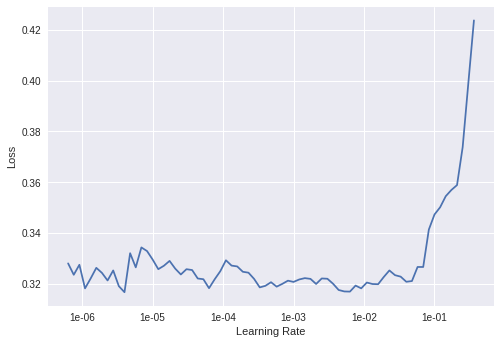

In [0]:
learn.recorder.plot()

In [0]:
learn.fit?

In [0]:
learn.fit(12, 1e-03)

epoch,train_loss,valid_loss,accuracy
1,0.328940,0.381815,0.854749
2,0.320917,0.371071,0.860335
3,0.315360,0.374077,0.849162
4,0.315023,0.387048,0.854749
5,0.317160,0.389857,0.849162
6,0.312649,0.384291,0.854749
7,0.309947,0.386818,0.854749
8,0.304854,0.386176,0.854749
9,0.305758,0.378714,0.854749
10,0.306181,0.376883,0.854749


## Inference

In [0]:
row = dft.iloc[220]

In [0]:
row

PassengerId                  1092
Pclass                          3
Name           Murphy, Miss. Nora
Sex                        female
Age                           NaN
SibSp                           0
Parch                           0
Ticket                      36568
Fare                         15.5
Cabin                         NaN
Embarked                        Q
Name: 200, dtype: object

In [0]:
learn.predict(row)

(Category 1, tensor(1), tensor([0.1041, 0.8959]))

## get_preds

In [0]:
learn.export()

In [0]:
dft.fillna(method='pad', inplace=True)

In [0]:
testdata = TabularList.from_df(dft, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [0]:
testdata.items

array([0, 1, 2, 3, ..., 414, 415, 416, 417], dtype=object)

In [0]:
learn = load_learner('', test=testdata)

In [0]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
v = preds.numpy()

In [0]:
arr = np.argmax(v, axis=1 )

In [0]:
arr

array([0, 0, 0, 0, ..., 1, 0, 0, 0])

In [0]:
dft.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
subm = pd.DataFrame(dft["PassengerId"])

In [0]:
subm.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [0]:
subm['Survived'] = arr

In [0]:
subm.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
subm.Survived.value_counts()

0    264
1    154
Name: Survived, dtype: int64

In [0]:
subm.to_csv('gdrive/My Drive/Colab Notebooks/kaggle-titanic/submission/titanic-sub.csv', index=False)